# Prosper Loan Data Analysis
## by Akinyemi Tito

## Investigation Overview


    In this analysis I wanted to look at the distribution of loan status and why most loans were listed

## Dataset Overview

    The loan dataframe contains 21 columns of all rows that had a prosper rating. The columns include ProsperRating (alpha), LoanStatus, EmploymentStatus, IsBorrowerHomeowner, BorrowerAPR and many more.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df= pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#changing datatype to category
ordered_cat= {
    'ProsperScore': [0,1,2,3,4,5,6,7,8,9,10, 11],
    
    'IncomeRange': ['$100,000+','$75,000-99,999', '$50,000-74,999', '$25,000-49,999',
                    '$1-24,999' ,'Not displayed'  , '$0' ,'Not employed'] ,
    
    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
     }
cat= ['ListingCategory (numeric)' , 'IncomeVerifiable', 'IsBorrowerHomeowner', 'LoanStatus', 'EmploymentStatus']
for var in ordered_cat:
    ordered_var= pd.api.types.CategoricalDtype(ordered=True,
                                              categories= ordered_cat[var] )
    loan_df[var]= loan_df[var].astype(ordered_var)
for var in cat:
    unordered_var= pd.api.types.CategoricalDtype(ordered=False)
    loan_df[var]= loan_df[var].astype(unordered_var)


In [4]:
#subsetting the dataframe to only required columns
loan = loan_df.iloc[: , [63,5,4,7,8,14,15,16,18,19,20,21,34,42,43,51,46,47,48,56,80]]
loan=loan[~loan['ProsperScore'].isnull()]
loan.shape

(84853, 21)

## Distribution of Prosper  Rating (Alpha)

Prosper Rating is assigned when a loan is listed. The column is plotted in a bar chart to show the count of each category.

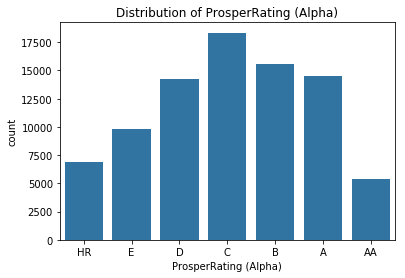

In [5]:
## a countplot function that takes the x-axis parameter, the figure title and ylabel.

def count_chart(x):
    fig_title= 'Distribution of '+ x
    base_color= sns.color_palette()[0]
    sns.countplot(x=x, data=loan, color=base_color)
    plt.title(fig_title)
    plt.show()
count_chart('ProsperRating (Alpha)');

## Percentage of Borrower's who own a home.

IsBorrowerHomeowner takes two values of true or false. Most borrowers own a home and are employed as the Employment status displays. This makes me wonder why they apply for a loan when they clearly have a source of income.


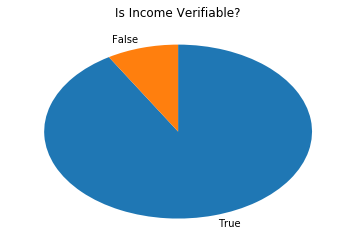

In [6]:
x=loan['IncomeVerifiable'].value_counts()
plt.pie(x, labels = x.index, startangle = 90, counterclock = False)
plt.title('Is Income Verifiable?')
plt.show()


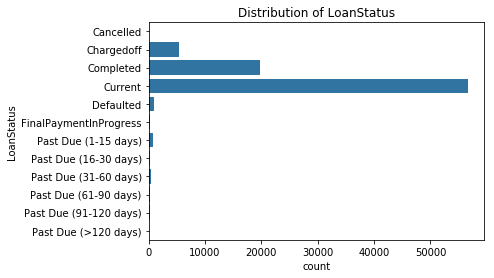

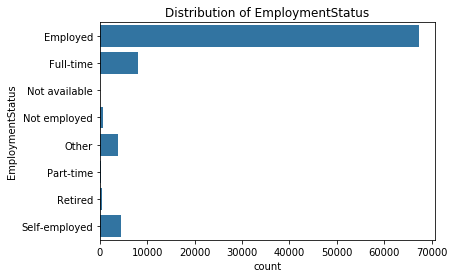

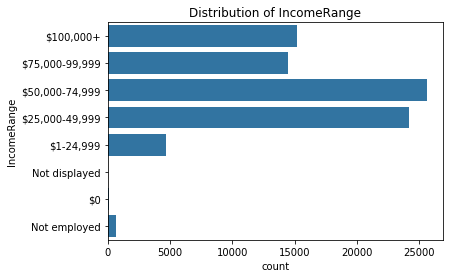

In [7]:
barplot= ('LoanStatus','EmploymentStatus', 'IncomeRange')
#creating a loop through the list to plot them all
def count_charty(y):
    fig_title= 'Distribution of '+ y
    base_color= sns.color_palette()[0]
    sns.countplot(y=y, data=loan, color=base_color)
    plt.title(fig_title)
    plt.show()     
for i in barplot:
    y=i
    count_charty(y) 
       

##  Listing Category Distribution
> For each loan the borrower lists it under a category for why the loan is required.

Below is the key to each figure encoded:
0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

>Most loans are listed under Debt consolidation. Most of the loans are taken to pay off already acquired debt which is not a very smart decision.

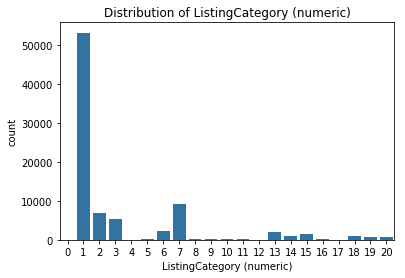

In [8]:

count_chart('ListingCategory (numeric)');

## Do people who earn more borrow higher amounts of money?
 
We would expect that people who earn more won't have to borrow high amounts of money but, this is not the case as earning prowess positively correlates with the amount borrowed. Although there are a few outliers, in general people tend to borrow lesser amounts when their income range is much lesser.


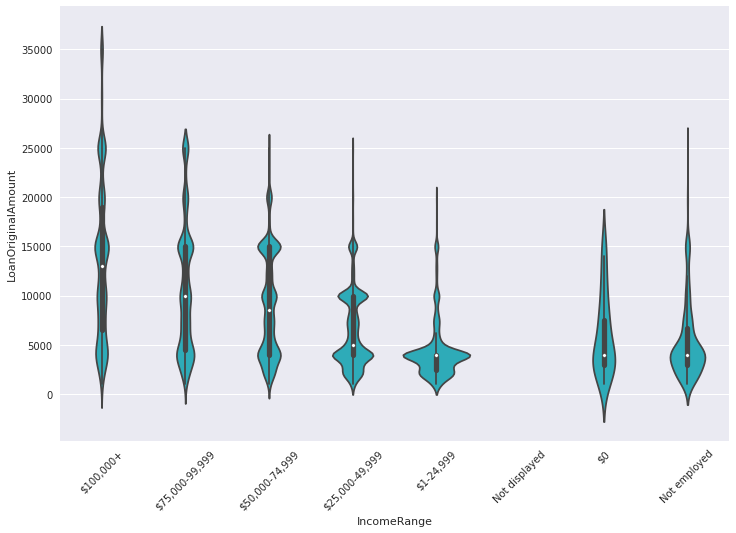

In [9]:
# Do people who earn more borrow the highest amount of money?
base_color= sns.color_palette()[9]
sns.set(rc = {'figure.figsize':(12,8)})
sns.violinplot(x='IncomeRange', y= 'LoanOriginalAmount', data=loan, color=base_color)
plt.xticks(rotation=45);


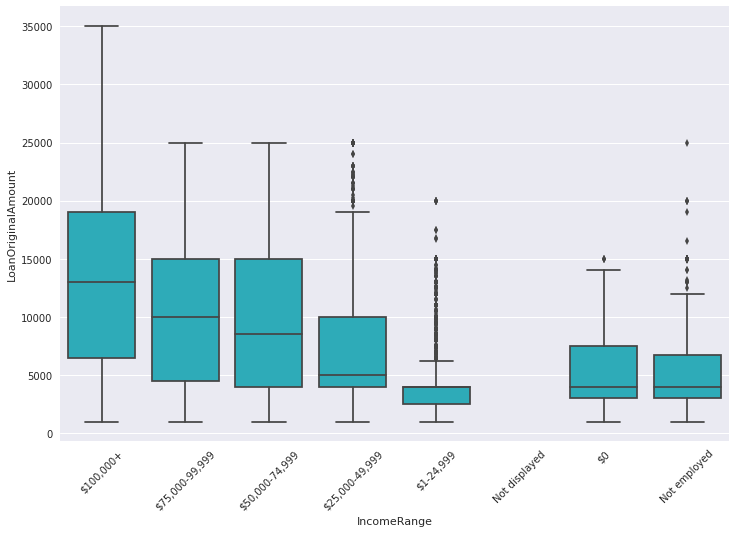

In [10]:
# Showing the boxplot to see outliers
sns.boxplot(x='IncomeRange', y= 'LoanOriginalAmount', data=loan, color=base_color)
plt.xticks(rotation=45);

In [ ]:
!jupyter nbconvert Presentation_slides.ipynb --to slides --no-prompt --post serve --no-input

[NbConvertApp] Converting notebook Presentation_slides.ipynb to slides
[NbConvertApp] Writing 283513 bytes to Presentation_slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Presentation_slides.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: n